# Example ABCD_ML notebook on videogaming

# Init Phase

In [1]:
import ABCD_ML

import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Define file locations used in notebook as short variables

In [2]:
data_dr = '/mnt/sdb2/'
dr1 = os.path.join(data_dr, 'ABCD2p0NDA/')
dr2 = os.path.join(data_dr, 'ABCDFixRelease2p0p1/')

target_loc = os.path.join(dr1, 'abcd_stq01.txt')
name_map_loc = os.path.join(dr2, 'Fix Release Notes 2.0.1_Public', '24. ABCD_Release_2.0.1_Updates',
                            'abcd_2.0.1_mapping.csv')

mid_loc1 = os.path.join(dr2, 'abcd_midabwdp01.txt')
mid_loc2 = os.path.join(dr2, 'abcd_midabwdp202.txt')

sst_loc1 = os.path.join(dr2, 'abcd_tfsstabwdp101.txt')
sst_loc2 = os.path.join(dr2, 'abcd_tfsstabwdp201.txt')

nback_loc1 = os.path.join(dr2, 'abcd_tfabwdp101.txt')
nback_loc2 = os.path.join(dr2, 'abcd_tfabwdp201.txt')

strat_loc = os.path.join(dr1, 'acspsw03.txt')

### Define the main class object

In [3]:
ML = ABCD_ML.ABCD_ML(exp_name = 'video_games',
                     existing_log = 'overwrite',
                     random_state = 1)

exp_name = video_games
log_dr = /home/sage/ABCD_ML/Examples
existing_log = overwrite
verbose = True
exp log dr setup at: /home/sage/ABCD_ML/Examples/video_games
log file at: /home/sage/ABCD_ML/Examples/video_games/logs.txt
notebook = True
use_default_subject_ids = False
low memory mode = False
strat_u_name = _Strat
random state = 1
ABCD_ML object initialized


# Loading Phase

In [4]:
ML.Set_Default_Load_Params(dataset_type='basic',
                           subject_id='src_subject_id',
                           eventname='baseline_year_1_arm_1',
                           eventname_col='eventname',
                           overlap_subjects=False,
                           na_values=['777', '999'],
                           drop_na=True,
                           drop_or_na='drop')

Default load params set within self.default_load_params.



### Load name map to convert between nda name and deap name

In [5]:
ML.Load_Name_Map(loc = name_map_loc,
                 dataset_type = 'custom',
                 source_name_col = 'nda_name',
                 target_name_col = 'deap_name')

Loading /mnt/sdb2/ABCDFixRelease2p0p1/Fix Release Notes 2.0.1_Public/24. ABCD_Release_2.0.1_Updates/abcd_2.0.1_mapping.csv  with dataset type: custom
Loading new name_map from file!


### Load the target variable

screen3_wkdy_y = weekday
screen9_wknd_y = weekend

- 0 = None; .25 = < 30 minutes;
- 0.5 = 30 minutes;
- 1 = 1 hour;
- 2 = 2 hours;
- 3 = 3 hours;
- 4 = 4+ hours

Loading /mnt/sdb2/ABCD2p0NDA/abcd_stq01.txt  with dataset type: basic
4951 subjects have been dropped based on passed eventname params.
Dropped 0 cols for all missing values
Dropped 37 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0

loading: screen3_wkdy_y
loading: screen9_wknd_y

Final shape:  (11838, 2)

Total valid overlapping subjects = 11838

All loaded targets
0 : screen3_wkdy_y
1 : screen9_wknd_y

Set to overlapping loaded subjects.
-- screen3_wkdy_y --


,screen3_wkdy_y
count,11838.000000
mean,0.927036
std,1.140849
min,0.000000
25%,0.250000
50%,0.500000
75%,1.000000
max,4.000000


Num. of unique vals: 7



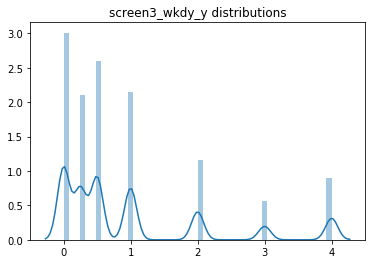


-- screen9_wknd_y --


,screen9_wknd_y
count,11838.000000
mean,1.230993
std,1.317467
min,0.000000
25%,0.250000
50%,0.500000
75%,2.000000
max,4.000000


Num. of unique vals: 7



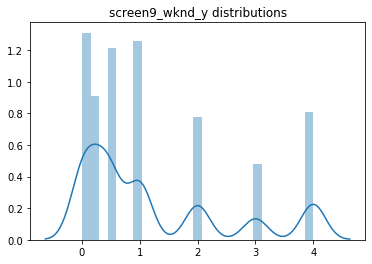

In [6]:
ML.Load_Targets(loc = target_loc,
                col_name = ['screen3_wkdy_y', 'screen9_wknd_y'],
                data_type = ['f', 'f'])

ML.Show_Targets_Dist()

cleared targets.

Loading user passed df
Dropped 0 cols for all missing values
Dropped 0 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0

loading: gaming_hours

Final shape:  (11838, 1)

Total valid overlapping subjects = 11838

All loaded targets
0 : gaming_hours

Set to overlapping loaded subjects.
-- gaming_hours --


,gaming_hours
count,11838.000000
mean,7.097166
std,7.752232
min,0.000000
25%,1.750000
50%,4.000000
75%,9.000000
max,28.000000


Num. of unique vals: 44



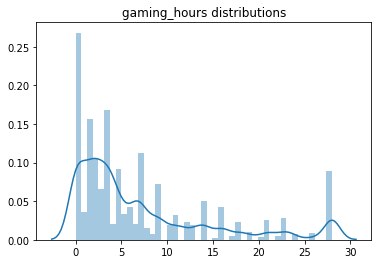

In [7]:
# Scale by days of week
ML.targets['screen3_wkdy_y'] = ML.targets['screen3_wkdy_y'] * 5
ML.targets['screen9_wknd_y'] = ML.targets['screen9_wknd_y'] * 2

# Sum the two cols together, and merge them into a df
summed = ML.targets['screen3_wkdy_y'] + ML.targets['screen9_wknd_y']
as_df = summed.to_frame(name='gaming_hours')

# Load targets from the new df, and clear existing loaded targets
ML.Load_Targets(df = as_df,
                col_name = 'gaming_hours',
                data_type = 'f',
                clear_existing=True)

ML.Show_Targets_Dist()

### Convert to binary problem

Binarizing gaming_hours
Setting: 1976 as 0.
Setting: 1208 as 1.
Dropping: 12606

Total valid overlapping subjects = 3184

Set to overlapping loaded subjects.
-- gaming_hours --


,Original Name,Counts,Frequency
Internal Name,,,
0.0,<1,1976,0.620603
1.0,>20,1208,0.379397


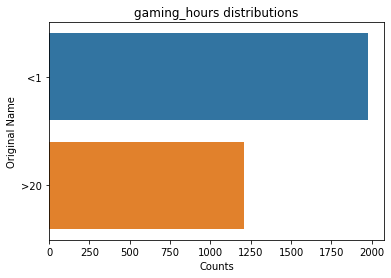

In [8]:
ML.Binarize_Target(lower=1, upper=20)
ML.Show_Targets_Dist()

### Load in all nback, sst and mid rois, all contrasts with some filtering

In [ ]:
ML.Load_Data(loc = [nback_loc1, nback_loc2, mid_loc1, mid_loc2, sst_loc1, sst_loc2],
             filter_outlier_std = 15)
ML.Show_Data_Dist(plot_type = 'hist')

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_tfabwdp101.txt  with dataset type: basic
dropped ['collection_id', 'abcd_tfabwdp101_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_tfabwdp201.txt  with dataset type: basic
dropped ['collection_id', 'abcd_tfabwdp201_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_midabwdp01.txt  with dataset type: basic
dropped ['collection_id', 'abcd_midabwdp01_id', 'dataset_id', 'subjectkey', 'interview_date', 'interview_age', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_midabwdp202.txt  with dataset type: basic
dropped ['collection_id', 'abcd_midabwdp202_id', 'dataset_id', 

### Load in "Strat" values

In [ ]:
ML.Load_Strat(loc = mid_loc1,
              col_name = 'sex',
              binary_col = True)

ML.Load_Strat(loc = strat_loc,
              col_name = 'rel_family_id')

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_midabwdp01.txt  with dataset type: basic
Dropped 0 cols for all missing values
Dropped 1 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0

Total valid overlapping subjects = 1934

Loading /mnt/sdb2/ABCD2p0NDA/acspsw03.txt  with dataset type: basic
Dropped 0 cols for all missing values
Dropped 2 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0
Merged with existing!
New combined shape: (9109, 2)

Total valid overlapping subjects = 1934



# Validation Phase

### Define the strategy to use across train test and k-fold splits

In [ ]:
ML.Define_Validation_Strategy(groups=['rel_family_id'])


Total valid overlapping subjects = 1934
Removing non overlapping subjects from loaded data, covars, ect...

CV defined with group preserving over 1852 unique values.


### Perform a global train test split

In [ ]:
ML.Train_Test_Split(test_size = .2)

Preparing final data, in self.all_data
Any changes to loaded data, covars or strat will not be included, from now on.

Final data (w/ target) for modeling loaded shape: (1934, 3851)
Performing split on 1934 subjects!
Test split size: 0.2

Performed train test split!
Train size: 1548
Test size:  386


# Modeling Phase

### Set default re-usable parameters

#### Note: feats_to_use = '_sst_' means we will use only SST data

In [ ]:
ML.Set_Default_ML_Params(problem_type = 'binary',
                         metric = ['matthews', 'macro roc auc', 'balanced accuracy', 'f1'],
                         scaler = 'robust',
                         scaler_scope = 'all',
                         splits = 3,
                         n_repeats = 2,
                         feats_to_use = '_sst_',
                         search_type = 'RandomSearch',
                         search_splits = 3,
                         search_n_iter = 60,
                         n_jobs = 8)

No default target passed, set to 0.
No default model type passed, set to linear.
No default imputer passed, set to [mean, median]
No default imputer scope passed, set to [float, categorical]
No default sampler passed, set to None
No default sample on passed, set to targets
No default feat selector passed, set to None
No default ensemble type passed, set to basic ensemble
No default ensemble split passed, set to .2
No default model param ind passed, set to 0
No default imputer scaler params passed, set to 0
No default data scaler params passed, set to 0
No default sampler params passed, set to 0
No default feat selector params passed, set to 0
No default ensemble type params passed, set to 0
No default subjects_to_use passed, set to all
No default compute_train_score passed, set to False
No default random state passed, using class random state value of 1
No default feat_importances passed, set to base
No default feat_importances_params passed, set to, set to 0
No default cache passed, s

### Elastic-net w/ random parameter search & univariate feature selection filter

In [ ]:
raw_scores, raw_preds = ML.Evaluate(model = 'elastic net logistic',
                                    model_params = 1,
                                    search_n_iter = 14,
                                    feat_selector = 'univariate selection',
                                    feat_selector_params = 0)

Setting default ML verbosity settings!
Note, if the following values are not desired, call self.Set_Default_ML_Verbosity()
No default progress bar passed, set to True.
No default fold name passed, set to False.
No default time per fold passed, set to False.
No default score per fold passed, set to False.
No default fold sizes passed, set to False.
No default save to logs passed, set to False.

Running Evaluate with:
target = 0
problem_type = binary
model = elastic net logistic
model_params = 1
metric = ['matthews', 'macro roc auc', 'balanced accuracy', 'f1']
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = univariate selection
feat_selector_params = 0
splits = 3
n_repeats = 2
search_type = RandomSearch
search_splits = 3
search_n_iter = 14
n_jobs = 8
feats_to_use = _sst_
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with u

### Class balanced bagging ensemble of light gradient boosting machines w/ feat. selection

In [ ]:
raw_scores, raw_preds = ML.Evaluate(model = 'light gbm',
                                    model_params = 1,
                                    feat_selector = 'univariate selection',
                                    feat_selector_params = 0,
                                    ensemble = 'balanced bagging',
                                    ensemble_params = 0)

### Non-linear rbf kernel SVM

In [ ]:
raw_scores, raw_preds = ML.Evaluate(model = 'svm',
                                    model_params = 1,
                                    feat_selector = 'univariate selection',
                                    feat_selector_params = 1)

Repeated, but with all tasks

In [ ]:
ML.Set_Default_ML_Params(feats_to_use = 'all')

raw_scores, raw_preds = ML.Evaluate(model = 'elastic net logistic',
                                    model_params = 1,
                                    search_n_iter = 14,
                                    feat_selector = 'univariate selection',
                                    feat_selector_params = 0)

raw_scores, raw_preds = ML.Evaluate(model = 'light gbm',
                                    model_params = 1,
                                    feat_selector = 'univariate selection',
                                    feat_selector_params = 0,
                                    ensemble = 'balanced bagging',
                                    ensemble_params = 0)

raw_scores, raw_preds = ML.Evaluate(model = 'svm',
                                    model_params = 1,
                                    feat_selector = 'univariate selection',
                                    feat_selector_params = 1)